# 양자 걸음 탐색 알고리즘

양자 걸음은 고전 마르코프 체인의 양자적 해석이며 많은 양자 알고리즘의 핵심이 되었습니다. 이번 절에서는 그래프에 표시된 요소를 찾는 양자 걸음 탐색 알고리즘을 구현합니다. 이 알고리즘은 고전 알고리즘에 비해 속도가 2배 향상됩니다.

## 1.고전 마르코프 체인 <a name="markov"></a>

마르코프 체인은 주로 실세계 프로세스를 모델링하는 확률적 프로세스입니다. 각 시간 단계마다 상태간 이동 확률을 의미하는 상태 및 천이 확률로 이루어집니다. 앞으로 다루고자 하는 이산 시간 마르코프 체인에서는 시간 단계가 이산적입니다. 마르코프 체인은 마르코프 성질을 충족합니다. 즉, 프로세스의 다음 단계는 이전 단계가 아닌 현재 단계에만 의존합니다. 마르코프 체인에는 각 상태를 이동할 확률을 의미하는 연관 천이 행렬 P가 있습니다. 아래는 마르코프 체인 및 연관 천이 행렬 $P$의 예 입니다. \begin{equation} P= \begin{pmatrix} 0.1 &amp; 0.3 &amp; 0.3\ 0.1 &amp; 0.1 &amp; 0.2 \ 0.8 &amp; 0.6 &amp; 0.5 \end{pmatrix} \label{eq:matrix_example} \end{equation} <img src="images/markov_example.png" width="480">

천이 행렬 $P$에 대해 $t$ 시간 단계 이후에 확률 분포 $P^t$를 구할 수 있습니다.

## 2.양자 걸음 <a name="qwalks"></a>

양자 걸음은 고전 마르코프 체인의 양자적 해석입니다. 중첩 때문에 양자 걸음은 회로를 측정할 때까지 가능한 모든 경로를 동시에 탐색합니다. 양자 간섭을 활용하면 일부 상태는 제거할 수 있습니다. 이를 통해 오답을 빠르게 제거하도록 알고리즘을 설계할 수 있기 때문에 양자 걸음 알고리즘은 고전 알고리즘 보다 빠릅니다. 양자 걸음에는 두 가지 일반 모델인 동전 양자 걸음과 Szegedy 양자 걸음이 있으며, 이는 특정 상황에서 동일합니다. 동전 양자 걸음은 그래프의 꼭짓점(vertex) 상에서 걸음인 반면 Szegedy 양자 걸음은 간선(edge)을 활용합니다. 양자 걸음을 구현하는 방법을 보이기 전에 두 모델을 소개하겠습니다.

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$ $\newcommand{\bra}[1]{\left\langle{#1}\right|}$

### 2.A 동전 양자 걸음 <a name="coined"></a>

동전 양자 걸음의 간단한 예는 무한 정수 선 상을 걷는 것입니다. 이 경우 보행자(walker)는 $\mathbb{Z}$에 속하는 모든 정수를 걸을 수 있으므로 보행자의 위치를 정수 ${\ket{j} : j \in  \mathbb{Z} }$ 로 나타냅니다. 동전으로 보행자의 움직임을 결정할 수 있습니다. 정수 선 상에서 보행자는 왼쪽이나 오른쪽으로 갈 수 있습니다. 따라서 동전의 계산 기저는 ${\ket{0}, \ket{1}}$ 이며 동전이 $\ket{0}$ 이면 보행자를 한 방향으로, $\ket{1}$ 이면 다른 방향으로 보행자를 움직입니다.

동전 양자는 그래프에 속한 노드 위를 걷는 것이며 노드를 상태라고 합니다. 보행자는 간선으로 연결된 상태 사이를 이동할 수 있습니다. 동전 모델에는 두 개의 양자 상태와 두 개의 연산자가 있습니다. 첫 번째 상태는 보행자의 위치를 나타내는 위치 상태 입니다. 위의 걷기의 경우 보행자는 정수 선 상 어디에나 있을 수 있으므로 위치 상태는 정수입니다. 다른 상태는 동전 상태입니다. 동전 상태는 보행자가 다음 단계에서 어떻게 움직여야 하는지를 결정합니다. 동전 상태와 위치 상태 모두 힐버트 공간에서 벡터로 나타낼 수 있습니다. 동전 상태를 $\mathcal{H}_C$에 속한 벡터로 표현하고 위치 상태를 $\mathcal{H}_P$에 속한 위치 상태로 표현하면 전체 보행자에 대한 양자 공간을 $\mathcal{H} = \mathcal{H}_C \otimes \mathcal{H}_P$으로 표현할 수 있습니다.

앞서 언급했듯이 이 모델에는 동전 연산자 $C$ 와 이동 연산자 $S$ 두 개가 있습니다. 동전 연산자는 각 시간 단계에서 $\mathcal{H}_C$에 대해 동작하고 보행자를 중첩하여 모든 가능한 경로를 동시에 걷습니다. 정수 선 위를 걷는 경우 이는 각 시간 단계에서 왼쪽과 오른쪽으로 모두 이동함을 의미합니다. 다양한 동전 연산자가 있지만 가장 일반적인 연산자는 하다마드 동전과 그로버 동전입니다. 하다마드 동전은 보행자를 동일하게 중첩하는 하다마드 게이트입니다.

\begin{equation} H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 &amp; 1 \ 1 &amp; -1 \end{bmatrix} \end{equation}

그로버 동전은 그로버 알고리즘에서 도입된 그로버 확산 연산자이며 다음과 같이 정의할 수 있습니다.

\begin{equation} G = \begin{bmatrix} \frac{2}{n} -1 &amp; \frac{2}{n} &amp; \ldots &amp; \frac{2}{n}\ \frac{2}{n} &amp; \frac{2}{n} - 1  &amp; \ldots &amp; \frac{2}{n} \ \vdots &amp; \vdots &amp; \ddots &amp; \vdots \ \frac{2}{n} &amp; \frac{2}{n} &amp; \ldots &amp; \frac{2}{n} -1 \end{bmatrix} \end{equation}

하다마드 동전과 같이 그로버 동전은 보행자를 중첩시키지만 약간 다르게 동작합니다. $\ket{000}$ 위치에 있는 보행자에 그로버 코인을 적용하면 아래 그림과 같은 상태 벡터 확률을 얻습니다. 그림에서 볼 수 있듯이 그로버 동전은 하다마드 동전이 그러했듯이 보행자를 동일한 중첩상태로 만들지 않습니다. 대신에 $\ket{000}$ 상태는 다른 상태보다 훨씬 더 큰 확률로 나타납니다.

<img src="images/grover_prob.svg" width="480">

모델의 다른 연산자인 이동 연산자는 $\mathcal{H}_P$에 작용하여 보행자를 다음 위치로 이동시킵니다. 이동 연산자는 정수 선위를 걷는 보행자를 동전이 $\ket{0}$인 경우 왼쪽으로 이동시키고 동전이 $\ket{1}$인 경우 오른쪽으로 이동시킵니다.

\begin{equation} S \ket{0}\ket{j} = \ket{0}\ket{j+1} \end{equation}

\begin{equation} S \ket{1}\ket{j} = \ket{1}\ket{j-1} \end{equation}

위와 같이 정의된 이동 연산자를 사용하여 유니타리 연산자 $U$로 동전 양자의 한 단계를 나타낼 수 있습니다. \begin{equation} U = SC, \end{equation}

여기서 C는 동전 연산자 입니다. 정수 선 상의 양자 걸음을 위해 하다마드 동전을 사용하지만 C는 하다마드 동전, 그로버 동전 등 다른 동전 연산자일 수 있습니다.

몇 단계 앞을 내다볼 수 있습니다. $t$ 시간 단계 이후의 양자 상태 $\ket{\psi}$를 \begin{equation} \ket{\psi (t)} = U^t \ket{\psi(0)}, \end{equation}으로 표현할 수 있습니다. 여기서 $\ket{\psi(0)}$는 초기상태이고 U는 한 걸음에 대한 연산자 입니다 [1].

동전 양자 걸음은 모든 노드가 동일한 수의 이웃[2]을 갖는 일반 그래프에 가장 적합합니다. 비정규 그래프에 더 편리한 양자 걸음 모델의 대안은 다음에 살펴볼 Szegedy 모델입니다.

### 2.B Szedgedy 양자 걸음 <a name="szegedy"></a>

동전 걸음은 그래프의 노드 상에서 걷는 반면 Szegedy 걸음은 원래 그래프의 이분 이중 커버(cover)의 간선에서 걷습니다. 이중 커버 그래프는 원래 그래프보다 꼭지점이 두 배 더 많습니다. 노드가 원래 그래프에서 연결된 경우에도 이분 이중 커버 그래프에서 두 노드는 간선과 연결됩니다. 이 모델을 생성하기 위해서 고전 걸음에 대한 천이 확률 행렬 P 부터 시작합니다. 1 절에서 설명한 것 처럼 천이 행렬 $P$로 이산 시간 무작위 걸음을 표현합니다. $N \times N$ 천이 행렬 $P$를 갖는 꼭지점이 $N$개인 모든 그래프에 상응하는 이산 시간 양자 걸음을 힐베르트 공간 $\mathcal{H}^N \otimes \mathcal{H}^N$에 대한 유니타리 연산으로 정의할 수 있습니다. 상태 $j$ 에서 $k$ 상태로 천이할 확률을 P_{jk}$로 정의합니다. 걸음을 정의하기전에 정규화 상태를 정의합니다.

\begin{equation} \ket{\psi_j} := \sum_{k=1}^N \sqrt{P_{kj}} \ket{j,k}, ; j=1,...,N \end{equation}

그리고 ${\ket{\psi_j}}:j=1,...,N$ 으로의 사영(projection)은 다음과 같습니다.

\begin{equation} \Pi := \sum_{j=1}^N \ket{\psi_j} \bra{\psi_j} \label{eq:sz_pi} \end{equation}

이동 연산자 S는 다음과 같습니다.

\begin{equation} S := \sum_{j,k=1}^N \ket{j,k} \bra{k,j} \label{eq:sz_s} \end{equation}

위에 정의된 $S$ 와 $\Pi$에 대해 이산 시간 양자 걸음의 한 단계를 설명할 수 있습니다.

\begin{equation} U := S(2 \Pi - 1), \label{eq:sz_op} \end{equation}

여기서 $(2 \Pi - 1)$은 반사 연산자 입니다. 걸음의 $t$ 단계를 $U^t$로 정의합니다 [2].

### 2.C  동전 및 Szegedy 양자 걸음의 동등성 <a name="equivalence"></a>

그로버 동전을 사용한 동전 걸음은 Szegedy 양자 걸음과 동일한 것으로 알려져 있습니다. 자세한 내용은 Thomas G. Wong의 글[3]을 참조하시기 바랍니다. 여기서 그는 두 모델의 연산자 간 동등성을 보였습니다.

## 3. 하이퍼큐브 상에서 양자 걸음 구현 <a name="example1"></a>

하이퍼큐브는 $3$차원 큐브를 $n$차원으로 확장한 것입니다. 모든 노드의 차수는 $n$ 이고 하이퍼큐브에는 전체 $N=2^n$개의 노드가 있습니다. 이진수인 $n$ 튜플로 하이퍼큐브 그래프의 노드를 나타낼 수 있습니다. 노드 이웃의 이진 표현은 한 자리만 다릅니다. 예를 들어 4차원 하이퍼큐브에서 $0000$의 이웃은 $0001$, $0010$, $0100$, $1000$ 입니다. 따라서 노드는 해밍 거리가 1인 모든 노드에 연결됩니다. 간선에는 레이블이 있습니다. a번째 비트가 서로 다른 이웃한 노드는  $a$라는 간선으로 연결됩니다.

하이퍼큐브 상에서 동전 양자 걸음을 나타내는 힐베르트 공간은 $\mathcal{H} = \mathcal{H}^n \otimes \mathcal{H}^{2^n}$입니다. 여기서 $\mathcal{H}^n$은 동전 공간을 나타내고 $\mathcal{H}^{2^n}$은 보행자의 위치입니다. 계산 기저는 다음과 같습니다.

\begin{equation} \big{ \ket{a,\vec{v}}, 0 \leq a \leq n-1, \vec{v} \in  {(00...00), (00...01), ....., (11...11 )} \big}. \end{equation}

간선 $a$와 연관된 동전 계산 기저의 값 $a$는 보행자가 이동해야 하는 위치를 결정합니다. $a=0$이면 보행자는 첫 번째 이진 값이 현재 노드와는 다른 노드로 이동합니다. $a=1$이면 보행자는 두 번째 이진 값이 현재와 다른 노드로 이동합니다.  $\vec{e}_a$를 인덱스 $a$가 있는 값을 제외한 모든 이진값이 $0$인 n 튜플이라고 합니다. 그리고 이동 연산자 $S$는 보행자를 $\ket{a} \ket{\vec{v}}$ 상태에서 $\ket{\vec{v} \oplus \vec{e}_a}$ 상태로 이동시킵니다.

\begin{equation} S \ket{a} \ket{\vec{v}} = \ket{a} \ket{\vec{v} \oplus \vec{e}_a}. \end{equation}

이 걸음에 그로버 코인 $G$를 사용합니다. 따라서 진화 연산자는 다음과 같습니다.

\begin{equation} U = SG. \end{equation}

이제 4차원 하이퍼큐브에서 양자 걸음을 구현하는 방법을 설명하겠습니다. 동전 연산자와 이동연산자를 구현해야 합니다. Qiskit에서 필요한 라이브러를 import 하는 것부터 시작합니다. 

In [1]:
# 표준 Qiskit 라이브러리를 import 합니다.
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
from numpy import pi
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
import numpy as np
# IBM Q 계정을 불러옵니다.
provider = IBMQ.load_account()

회로에는 6개의 큐비트가 있으며, 이 중 4개는 위치를 나타내고 2개는 동전을 나타냅니다. 전에 살펴봤듯이 동전은 그로버 알고리즘의 확산자인 그로버 코인입니다. 이를 구현하는 것 부터 시작합니다. 

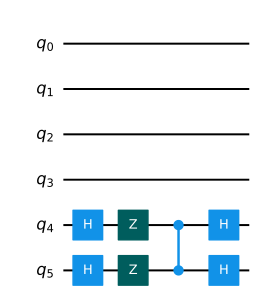

In [2]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP') 
# 코인 연산자
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
one_step_circuit.draw() 

이제 이동 연산자를 구현해 보겠습니다. 보행자는 이웃 노드로만 이동할 수 있고 모든 이웃 노드는 1비트만 다르다는 것을 알고 있습니다. 코인에 따라 보행자를 움직이고자 합니다. 노드 큐비트 중 하나에 NOT 게이트를 적용하여 보행자를 움직입니다. 코인이 $\ket{11}$ 상태이면 보행자를 노드의 첫 번째 큐비트가 다른 상태로 이동합니다. 동전이 $\ket{10}$ 또는 $\ket{01}$이면 보행자는 각각 두 번째 및 세 번째 큐비트가 각각 다른 상태로 이동합니다. 끝으로 그로버 코인이 $\ket{00}$이면 네 번째 큐비트를 뒤집습니다. 그로버 코인 다음에 CCNOT alc NOT 게이트로 이를 구현합니다. 이는 4차원 하이퍼큐브에서 양자 걸음의 한 단계입니다. 

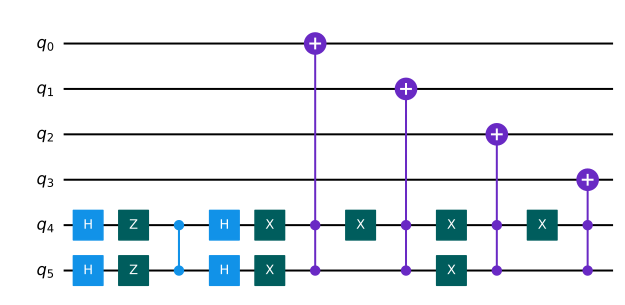

In [3]:
# 4차원 하이퍼큐브용 이동 연산자 함수
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
        if i%2==0:
            circuit.x(5)
        circuit.ccx(4,5,i)

shift_operator(one_step_circuit)

one_step_gate = one_step_circuit.to_instruction() 
one_step_circuit.draw() 

## 4. 양자 걸음 탐색 알고리즘 <a name="qwalkalgo"></a>

이제 그래프에서 표시된 꼭짓점을 찾는 양자 걸음 알고리즘을 구현할 것입니다. 먼저 알고리즘을 설명한 다음 구현을 합니다. 양자 걸음 알고리즘은 양자 걸음으로 그래프에 표시된 꼭짓점을 찾는 문제를 풉니다. 즉, $|M|$ 꼭짓점 집합을 표시하고 그래프에 있는 임의의 노드에서 시작하여 표시한 노드를 찾을 때까지 양자 걸음에 따라 이동합니다. 양자 걸음 탐색 알고리즘의 기본 상태에는 두 개의 레지스터가 있는데, 하나는 현재 노드에 해당하고 다른 하나는 이전 노드에 해당합니다. 즉, 기본 상태는 그래프의 간선에 해당합니다. $\mathcal{H}$ 상에 있는 천이 행렬이 $P$인 유니타리 연산자 $W(P)$를 갖는 고전 마르코프 체인을 바탕으로 양자 보행을 나타냅니다. 또한 $\ket{p_x} = \sum_y \sqrt{P_{xy}}\ket{y}$를 $x$ 노드의 이웃에 대한 균일 중첩으로 정의합니다. $\ket{x}\ket{y}$를 기저 상태로 합니다. $x$가 표시된 노드인 경우 기저 상태 $\ket{x}\ket{y}$를 ''좋음"으로 정의합니다. 그렇지 않으면 "나쁨''이라고 합니다. 이제 '좋음'' 과 ''나쁨'' 상태를 논의합니다.

\begin{equation} \ket{G} = \frac{1}{\sqrt{|M|}} \sum_{x \in M} \ket{x} \ket{p_x}, ; \ket{B} = \frac{1}{\sqrt{N-|M|}} \sum_{x \notin M} \ket{x} \ket{p_x}, \end{equation}

이는 좋음과 나쁨 기저 상태의 중첩입니다. 다음으로 $\epsilon = |M|/N$ 및 $\theta = \arcsin(\sqrt{\epsilon})$를 정의합니다.

즉, 알고리즘은 3 단계로 구성됩니다.

1. 초기 상태 설정 $\ket{U} = \frac{1}{\sqrt{N}} \sum_{x} \ket{x} \ket{p_x} = \sin{\theta} \ket{G} + \cos{\theta} \ket{B}$, 모든 간선에 대한 균일 중첩

2. $O(1/\sqrt{\epsilon})$ 번 반복

    (a) $\ket{B}$를 이용한 반사

    (b) $\ket{U}$를 이용한 반사

3. 계산 기저로 측정

하다마드 게이트와 위상 오라클을 이용한 $\ket{B}$ 반사를 활용하여 $1$ 단계를 쉽게 구현할 수 있습니다. 위상 오라클은 $x$가 첫 번째 레지스터에 있는 경우 $x$의 위상을 이동시키고 그렇지 않으면 회로를 변경하지 않습니다.

2(b) 단계는 다음의 매핑을 수행하는 유니타리 $R(P)$을 찾는 것과 같습니다. \begin{align} \label{eq:mapping_1} \ket{U} &amp;\mapsto \ket{U}, : \text{and} \\ket{\psi} &amp;\mapsto -\ket{\psi}, : \forall \ket{\psi} \text{$\ket{U}$에 직교하는 $W(P)$의 고유벡터 공간에 있는}

이 연산자를 찾기 위해 $W(P)$에 위상 추정을 적용합니다. 위에서 $W(P)$를 무작위 보행의 진화 연산자로 정의했습니다. 2.A 절에서 보았듯이 이는 유니타리 연산자입니다. 이것으로부터 $W(P)$의 고유값의 노름은 $1$ 입니다. 이 때문에 $W(P)$의 고유값을 $e^{\pm 2i\theta_j}$ 형식으로 쓸 수 있습니다. 유니타리 $W(P)$는 $\ket{U}$인 고유값 $1$에 상응하는 하나의 고유벡터를 가집니다. 이는 $\theta_1=0$ 입니다. $R(P)$는 보조 큐비트가 있는 레지스터를 추가하여 벡터 $\ket{U}$를 찾고 정밀도 $O(1/\sqrt{\delta})$로 위상을 추정합니다. 여기서 $\delta$는 $P$의 스펙트럼 갭입니다. 이를 위해선 $W(P)$ $O(1/\sqrt{\delta})$ 번 적용해야 합니다. $\ket{w}$를 고윳값이 $e^{\pm 2i\theta_j}$인 $W(P)$의 고유 벡터라고 합니다. 위상 추정으로 구한 $\theta_j$의 최상의 근사치를 $\tilde{\theta_j}$로 가정합니다. 2(b)단계에서 $\ket{w}$에 대한 매핑을 수행하는 $R(P}$ 연산은 [4]에 있습니다.

\begin{equation} \ket{w} \ket{0} \mapsto \ket{w} \ket{\tilde{\theta_j}} \mapsto (-1)^{|\tilde{\theta_j} \neq 0|} \ket{w} \ket{\tilde{\theta_j}} \mapsto (-1)^{|\tilde{\theta_j} \neq 0|} \ket{w} \ket{0} \end{equation}

## 5.예제: 4차원 하이퍼큐브에 대한 양자 걸음 탐색<a name="qiskiti"></a>

양자 걸음 탐색 알고리즘을 사용하면 $O(1/\sqrt{\epsilon})$ 단계에서 표시한 노드 집합을 찾을 수 있습니다. $\epsilon =  |M|/N$ 여기서 $M$은 표시한 노드의 수이고 $N$은 전체 노드의 수 입니다. 이 알고리즘은 보통 양자 상태를 나타내기 위해 두 개의 노드 레지스터를 사용하는 Szegedy 양자 걸음 알고리즘과 함께 사용됩니다. 하지만 그로버 동전을 사용하는 동전 걸음은 Szegedy 양자 걸음과 동일하며 동전 걸음의 구현은 일반적으로 덜 복잡하기 때문에 동전 걸음으로 알고리즘을 구현하기로 합니다. 3절에서 구현한 4차원 하이퍼큐브를 사용하겠습니다.

즉, 다음과 같이 알고리즘을 구현합니다. 동전 큐비트와 노드 큐비트에 하다마드 게이트를 적용하여 모든 간선에 균일한 중첩인 1 단계를 수행합니다.  2(a) 단계에서는 위상 오라클을 구현합니다. 2(b) 단계에서는 $\theta \neq 0$인 모든 양자 상태를 표시한 다음 하이퍼큐브에서 양자 걸음의 한 단계에 대해 위상 추정을 구현합니다. 보조 큐비트를 회전하여 이를 수행합니다. 이 단계의 마지막 부분에서는 위상 추정을 뒤집습니다. 세타 큐비트의 수는 $\theta$의 정밀도에 따라 달라집니다.

아래에서는 4차원 하이퍼큐브에 양자 걸음 탐색 알고리즘을 구현합니다. 

이 알고리즘의 경우 이전에 구현한 1 단계 게이트의 역을 사용해야 합니다. 내장된 회로 함수 inverse()를 사용하여 구합니다.

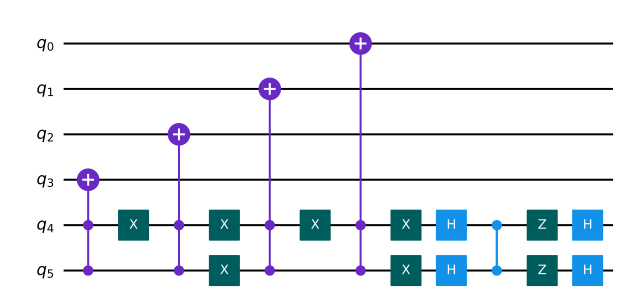

In [4]:
one_step_circuit.inverse().draw() 

반전된 1 단계 게이트는 나중에 위상 추정을 반전하는데 사용합니다. 3 절에서 구현한 1 단계 게이트와 그 역으로 제어 게이트를 만들어야 합니다. 제어 큐비트 값에 따라 이를 나중에 사용할 것 입니다. 

In [5]:
# Make controlled gates
inv_cont_one_step = one_step_circuit.inverse().control()
inv_cont_one_step_gate = inv_cont_one_step.to_instruction()
cont_one_step = one_step_circuit.control()
cont_one_step_gate = cont_one_step.to_instruction()

제어되는 1 단계 게이트와 역 게이트 모두 위상 주청에 사용됩니다. 양자 푸리에 변환은 위상 추정에 사용됩니다. Qiskit에는 양자 푸리에 변환을 구현한 QFT 함수가 있습니다. 위상 추정은 역 양자 푸리에 변환을 사용하지만 위상 추정을 역으로 하려면 일반 QFT도 사용해야 합니다.

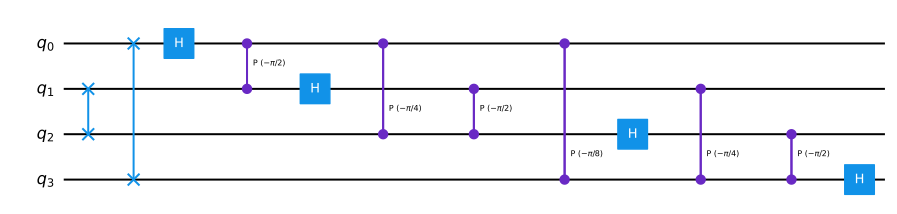

In [6]:
inv_qft_gate = QFT(4, inverse=True).to_instruction()  
qft_gate = QFT(4, inverse=False).to_instruction()

QFT(4, inverse=True).decompose().draw("mpl")

위상 추정을 구현하기 전에 상태 1011 과 1111을 표시하는 위상 오라클을 구현합니다. 그리고 이를 회로로 만듭니다. 이것은 알고리즘의 2(a) 단계입니다.

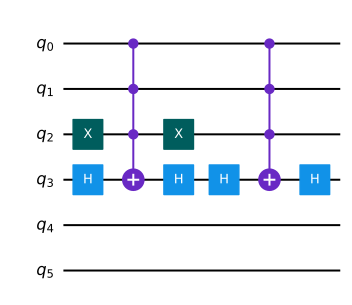

In [7]:
phase_circuit =  QuantumCircuit(6, name=' phase oracle ')
# 1011 표시
phase_circuit.x(2)
phase_circuit.h(3)
phase_circuit.mct([0,1,2], 3)
phase_circuit.h(3)
phase_circuit.x(2)
# 1111 표시
phase_circuit.h(3)
phase_circuit.mct([0,1,2],3)
phase_circuit.h(3)
phase_oracle_gate = phase_circuit.to_instruction()
# 위상 오라클 회로
phase_oracle_circuit =  QuantumCircuit(11, name=' PHASE ORACLE CIRCUIT ')
phase_oracle_circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
phase_circuit.draw() 

다른 큐비트가 0이 아닌 경우 보조 큐비트를 회전시키는 게이트를 구현할 것입니다. $\theta \neq 0$인 경우 보조 큐비트를 회전시키는 위상 추정에 이 게이트를 사용할 것입니다. 

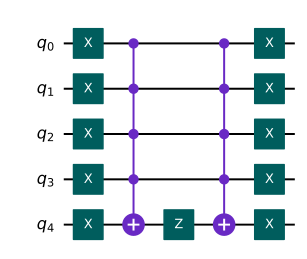

In [8]:
# 다른 큐비트가 0이 아니면 q_4로 표시
mark_auxiliary_circuit = QuantumCircuit(5, name=' mark auxiliary ')
mark_auxiliary_circuit.x([0,1,2,3,4])
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.z(4)
mark_auxiliary_circuit.mct([0,1,2,3], 4)
mark_auxiliary_circuit.x([0,1,2,3,4])

mark_auxiliary_gate = mark_auxiliary_circuit.to_instruction()
mark_auxiliary_circuit.draw()

이제 알고리즘에서 2(b) 단계를 구현합니다. 이 단계는 양자 걸음의 한 단계 위상 추정 다음에 $\theta \neq 0$일 때 회전시킨 보조 큐비트로 구성됩니다. 이를 위해 방금 만든 mark_auxiliary_gate를 사용합니다. 그런 다음 위상 추정을 뒤집습니다. 

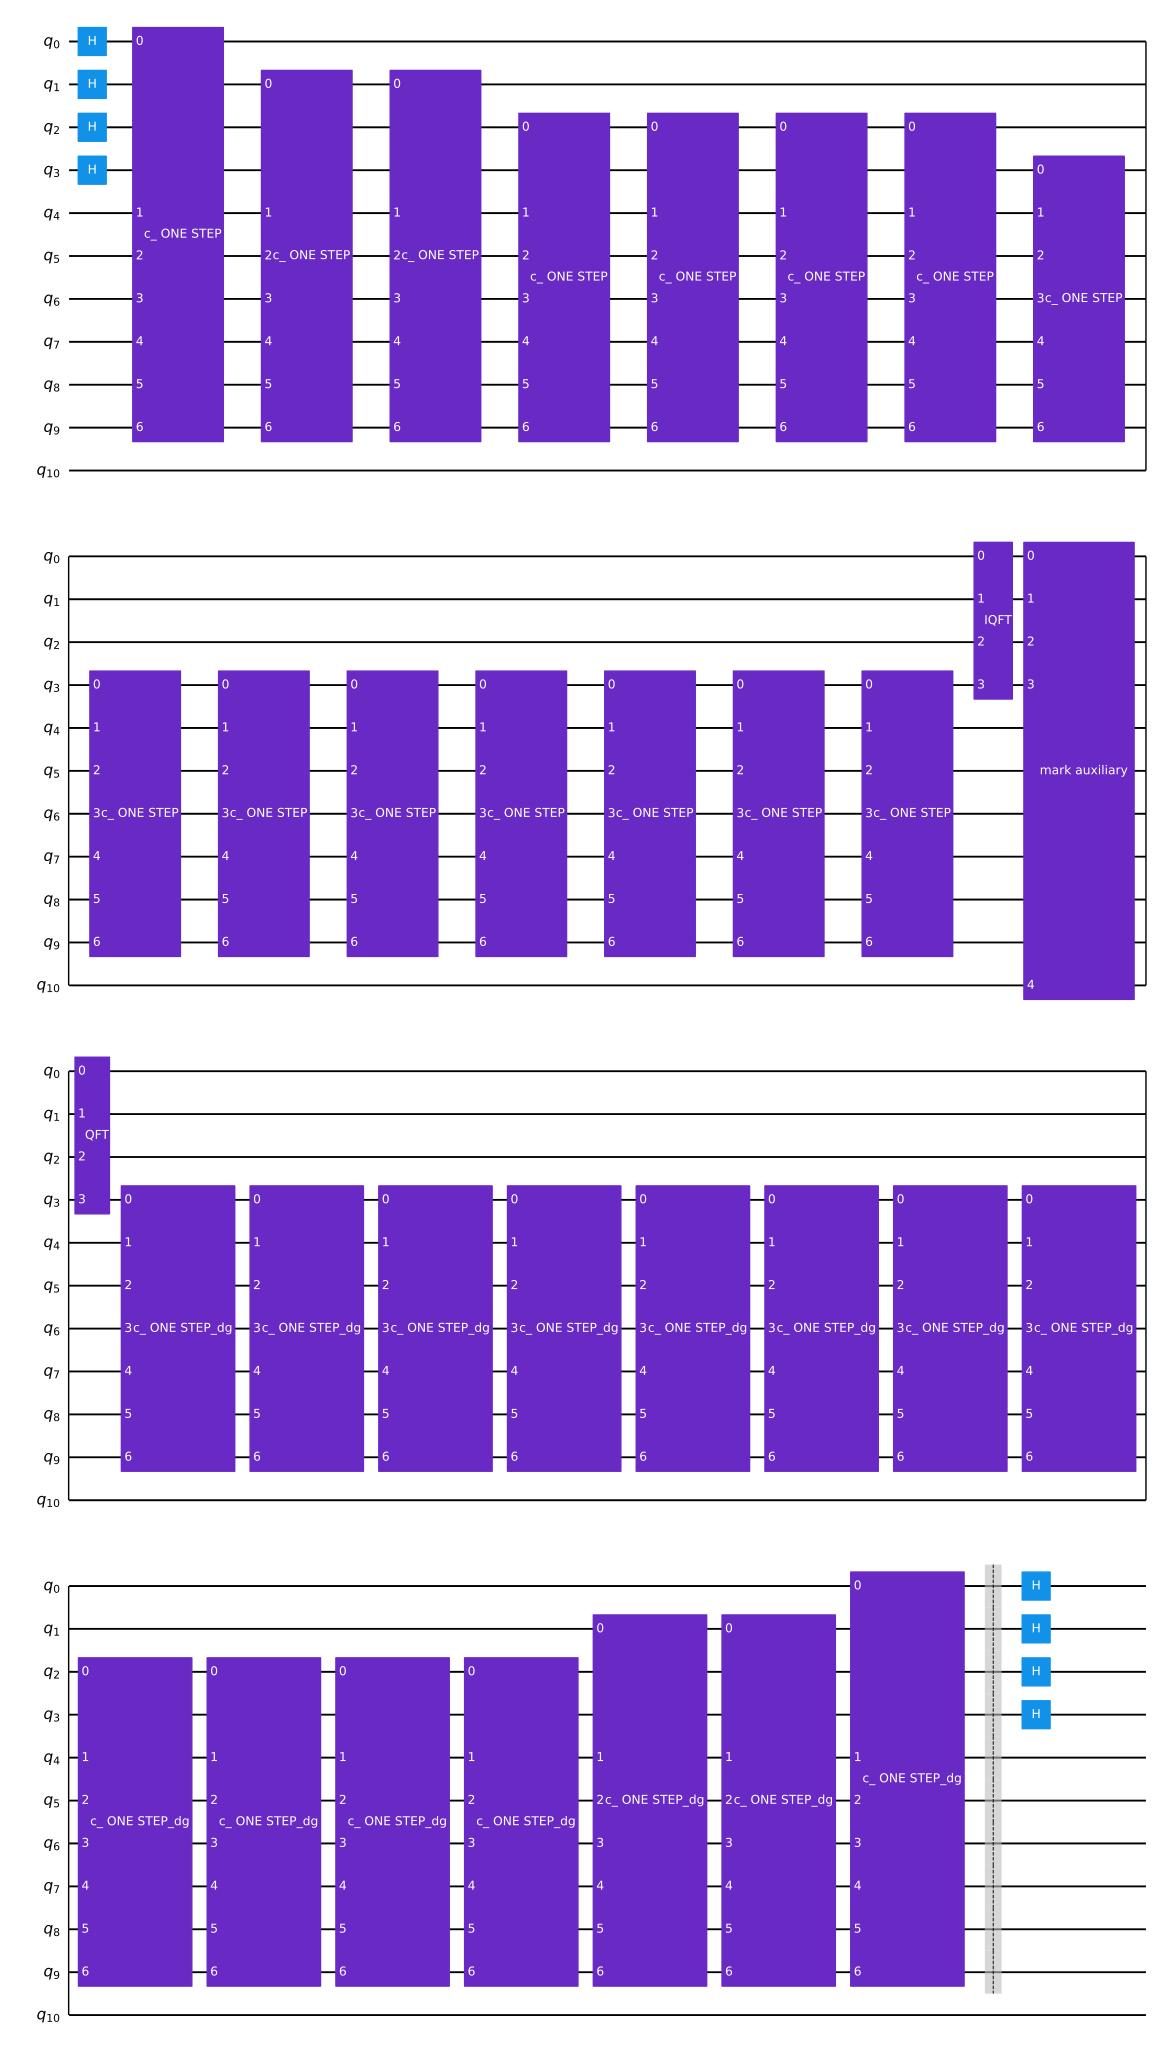

In [9]:
# 위상 추정
phase_estimation_circuit = QuantumCircuit(11, name=' phase estimation ')
phase_estimation_circuit.h([0,1,2,3])
for i in range(0,4):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(cont_one_step, [i,4,5,6,7,8,9])

# 역 푸리에 변환
phase_estimation_circuit.append(inv_qft_gate, [0,1,2,3])

# 보조 큐비트로 0이 아닌 모든 각도 쎄타를 표시 
phase_estimation_circuit.append(mark_auxiliary_gate, [0,1,2,3,10])

# 위상 추정 뒤집기 
phase_estimation_circuit.append(qft_gate, [0,1,2,3])   

for i in range(3,-1,-1):
    stop = 2**i
    for j in range(0,stop):
        phase_estimation_circuit.append(inv_cont_one_step, [i,4,5,6,7,8,9])
phase_estimation_circuit.barrier(range(0,10))
phase_estimation_circuit.h([0,1,2,3])

# 위상 추정 게이트 만들기
phase_estimation_gate = phase_estimation_circuit.to_instruction()
phase_estimation_circuit.draw() 

이제 이전에 만든 게이트를 사용하여 전체 양자 걸음 탐색 알고리즘을 구현합니다. 알고리즘의 1 단계인 하다마드 게이트를 노드 및 동전 큐비트에 적용하는 것 부터 시작합니다. 이 후 위상 오라클 게이트와 위상 추정 게이트를 반복적으로 적용합니다. (2(a) 및 2(b) 단계). 4절에 있는 알고리즘의 설명에 따라 $O(1/\sqrt{\epsilon})$ 반복이 필요합니다. 끝으로 노드 큐비트를 측정합니다. 

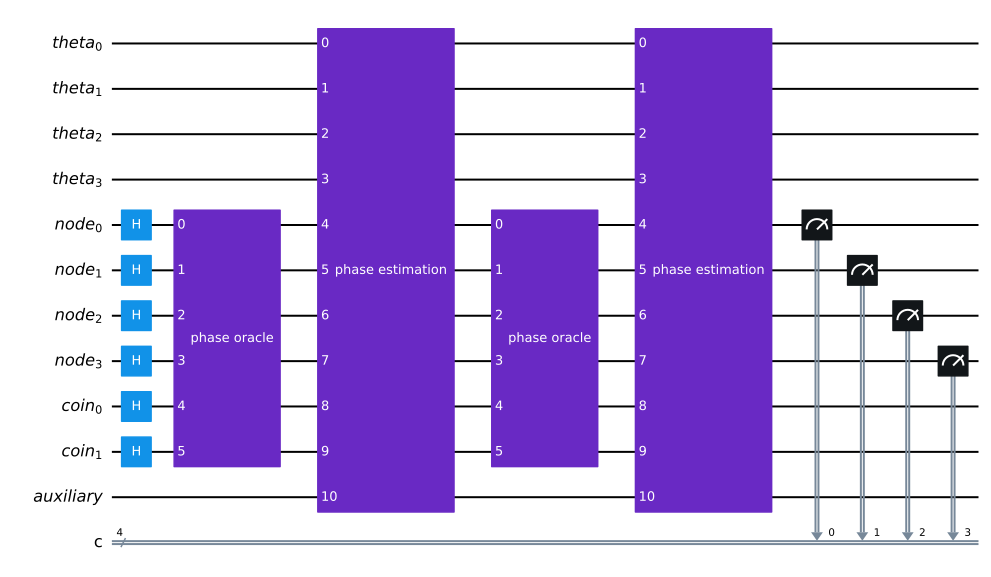

In [10]:
# 완전한 양자 걸음 탐색 알고리즘 구현
theta_q = QuantumRegister(4, 'theta')
node_q = QuantumRegister(4, 'node')
coin_q = QuantumRegister(2, 'coin')
auxiliary_q = QuantumRegister(1, 'auxiliary')
creg_c2 = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(theta_q, node_q, coin_q, auxiliary_q, creg_c2)
# 노드와 코인을 나타내는 큐비트에 하다마드 게이트를 적용 
circuit.h([4,5,6,7,8,9])
iterations = 2

for i in range(0,iterations):
    circuit.append(phase_oracle_gate, [4,5,6,7,8,9])
    circuit.append(phase_estimation_gate, [0,1,2,3,4,5,6,7,8,9,10])

circuit.measure(node_q[0], creg_c2[0])
circuit.measure(node_q[1], creg_c2[1])
circuit.measure(node_q[2], creg_c2[2])
circuit.measure(node_q[3], creg_c2[3])
circuit.draw()

마지막으로 qasm 시뮬레이터로 구현한 것을 실행합니다. 대부분의 경우 회로가 표시한 상태로 붕괴되는 것을 확인합니다. 

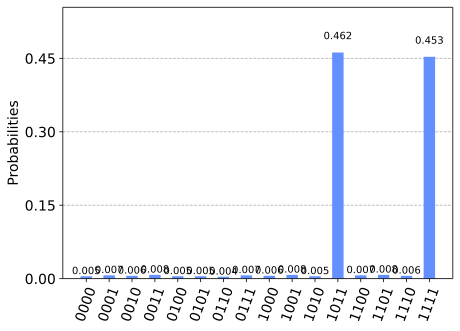

In [11]:
backend = Aer.get_backend('qasm_simulator') 
job = execute( circuit, backend, shots=1024 ) 
hist = job.result().get_counts() 
plot_histogram( hist )

## 6. 참고문헌 <a id="references"></a>

1. Renato Portugal. Quantum Walks and Search Algorithms. New York, NY: Springer New York, 2013
2. Markus G. Kuhn.Some Introductory Notes on Quantum Computing. Apr. 2000
3. Thomas G. Wong. “Equivalence of Szegedy’s and coined quantum walks”. In: Quantum InformationProcessing 16.9 (July 2017). ISSN: 1573-1332. DOI:10.1007/s11128-017-1667-y. URL:http://dx.doi.org/10.1007/s11128-017-1667-y.37
4. Ronald de Wolf. Quantum Computing: Lecture Notes. 2021. arXiv:1907.09415 [quant-ph]

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table

/usr/local/anaconda3/envs/terra-unstable/lib/python3.9/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
